#### Разметка данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_mathstat.csv", delimiter=" ", header=None)
porosity = data[0]
gamma_ray = data[1]

1. Построение вариационного ряда для выборки.

In [3]:
porosity = sorted(porosity)
gamma_ray = sorted(gamma_ray)
print(porosity)
print(gamma_ray)

[0.1781, 0.1781, 0.1797, 0.1797, 0.1818, 0.1818, 0.1822, 0.1822, 0.1868, 0.1868, 0.2113, 0.2197, 0.2197, 0.2205, 0.2271, 0.2271, 0.2309, 0.2312, 0.2365, 0.2365]
[35.2153, 54.6151, 54.6239, 60.1651, 64.6734, 66.9934, 66.9934, 93.5553, 93.8838, 98.0377, 113.936, 113.9367, 120.7253, 121.068, 121.2454, 121.3294, 121.8572, 121.8842, 125.4386, 125.4408]


2. Построение эфр.

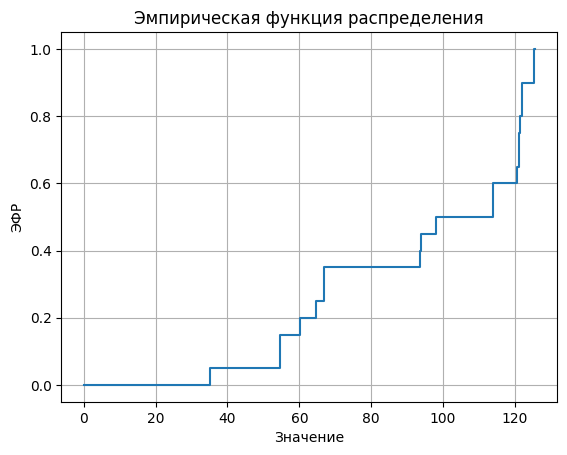

In [4]:
def draw_ecdf(x, fp=0, last_delta=0.1, **kwargs):
    x = sorted(x)
    ordin = [i // 2 for i in range(len(x) * 2)]
    ordin.append(len(x))
    ordin.append(len(x))
    abscis = [x[i // 2] for i in range(len(x) * 2)]
    abscis = [fp, *abscis, abscis[-1] + last_delta]
    
    plt.plot(abscis, np.array(ordin) / max(ordin), **kwargs)
    plt.xlabel('Значение')
    plt.ylabel('ЭФР')
    plt.title('Эмпирическая функция распределения')
    plt.grid(True)

# Пример вызова функции
draw_ecdf(gamma_ray)

3. Построение гистограммы.

Text(0.5, 1.0, 'Гистограмма гамма-каротажа')

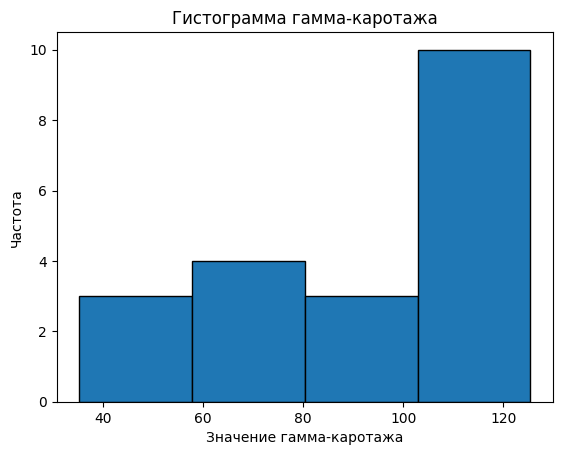

In [29]:
plt.hist(gamma_ray, bins=4, edgecolor='black')

# Добавление подписей к осям
plt.xlabel('Значение гамма-каротажа')
plt.ylabel('Частота')
plt.title('Гистограмма гамма-каротажа')

4. Вычисления.

In [31]:
# выборочные средние
def get_av(x):
    return sum(x)/len(x)
def get_s2(x):
    return sum([(el-get_av(x))**2 for el in x])/len(x)
def get_s(x):
    return get_s2(x)**0.5
def get_cov(x, y):
    n = len(x)
    # выборочн средние
    xm = get_av(x)
    ym = get_av(y)
#     print("mean: ", xm, ym)

    #центрируем
    x0 = np.array(x)-xm
    y0 = np.array(y)-ym
#     print("centered: ", x0, y0)

    # выборочные дисперсии
    xdisp = get_s2(x)
    ydisp = get_s2(y)
#     print("disp: ", xdisp, ydisp)

    # массив центрированных выборок
    ar0 = np.array([x0,y0])
    ar0 = ar0.T
    cov = [[0,0], [0,0]]
    kor = [[0,0], [0,0]]
    for i in range(2):
        for j in range(2):
            cov[i][j] = sum([ar0[l][i]*ar0[l][j] for l in range(n)])/n
#             print(f'cov[{i}][{j}]: {ar0}, {sum([ar0[l][i]*ar0[l][j] for l in range(n)])}', cov[i][j])
#             print(cov)
#             kor[i][j] = kov[i][j]/(xdisp*ydisp)**0.5
    return cov
def get_korr(x, y):
    cov = get_cov(x,y)
    korr = [[0,0], [0,0]]
    ar_s = [get_s(x), get_s(y)]
    for i in range(2):
        for j in range(2):
            korr[i][j] = cov[i][j]/ar_s[i]/ar_s[j]
    return korr

# Пример для выборки объема 3
print(f"Средние: x {get_av(porosity)}, y {get_av(gamma_ray)}")
print(f"Дисперсии: x {get_s2(porosity)}, y {get_s2(gamma_ray)}")
print(f"Стандартные отклонения: x {get_s(porosity)}, y {get_s(gamma_ray)}")
print(f"Ковариация xy: {get_cov(porosity,gamma_ray)}")
print(f"Корреляция xy: {get_korr(porosity,gamma_ray)}")

Средние: x 0.203885, y 94.7809
Дисперсии: x 0.000525593275, y 864.3336770100002
Стандартные отклонения: x 0.02292582114123723, y 29.399552326693687
Ковариация xy: [[0.000525593275, 0.6120908544999999], [0.6120908544999999, 864.3336770100002]]
Корреляция xy: [[1.0000000000000002, 0.9081347059807828], [0.9081347059807827, 1.0]]


5. Квартили.

25-й процентиль (первый квартиль): 66.4134
50-й процентиль (медиана): 105.98685
75-й процентиль (третий квартиль): 121.2664


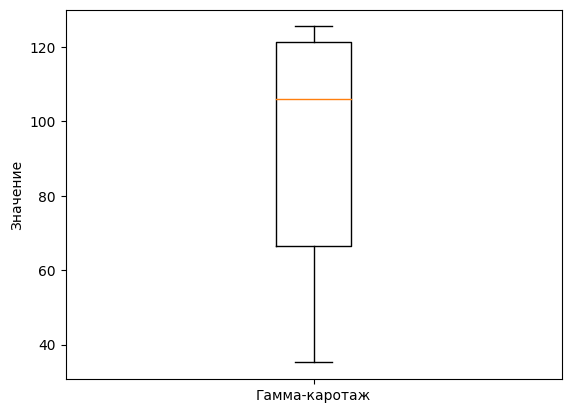

In [37]:
n=20
q25 = np.percentile(gamma_ray, 25)  # 25-й процентиль (первый квартиль)
q50 = np.percentile(gamma_ray, 50)  # 50-й процентиль (медиана)
q75 = np.percentile(gamma_ray, 75)  # 75-й процентиль (третий квартиль)

print(f"25-й процентиль (первый квартиль): {q25}")
print(f"50-й процентиль (медиана): {q50}")
print(f"75-й процентиль (третий квартиль): {q75}")
# Построение коробчатой диаграммы
plt.boxplot(gamma_ray)

# Добавление подписей к осям
plt.xticks([1], ['Гамма-каротаж'])  # Установка подписи для оси X
plt.ylabel('Значение')  # Установка подписи для оси Y

# Отображение графика
plt.show()

6. Поле наблюдений.

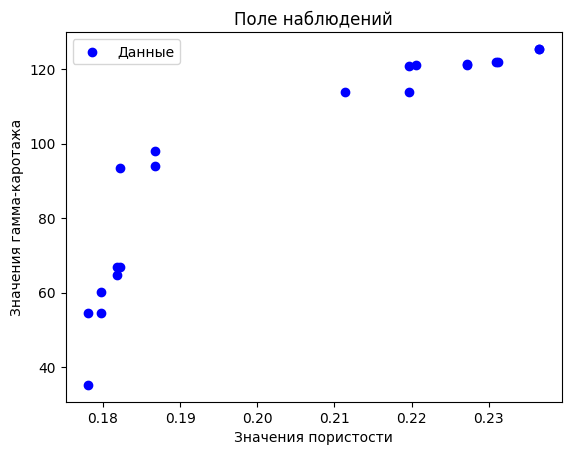

In [38]:
# Построение поля наблюдений (Scatter plot)
plt.scatter(porosity, gamma_ray, label='Данные', color='b', marker='o')

# Добавление подписей к осям и заголовка
plt.xlabel('Значения пористости')
plt.ylabel('Значения гамма-каротажа')
plt.title('Поле наблюдений')

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

7. Трёхмерная гистограмма.

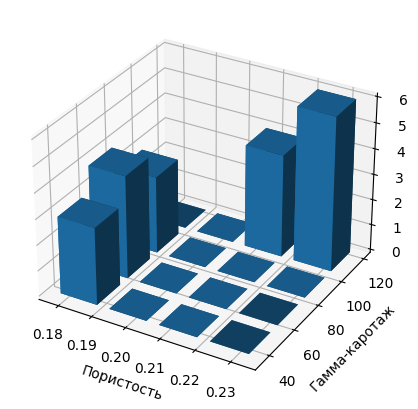

In [39]:
def draw_3dhist(x,y,bins=4):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=bins)

    # hist, xedges, yedges
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = 0.25 * (max(xpos)-min(xpos)) * np.ones_like(zpos)
    dy = 0.25 * (max(ypos)-min(ypos)) * np.ones_like(zpos)
    dz = hist.ravel()
    dx, dy, dz
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
    ax.set_xlabel('Пористость')
    ax.set_ylabel('Гамма-каротаж')
#     ax.set_zlabel('Количество попадений в интервал')
draw_3dhist(porosity,gamma_ray)